# chap 14 모델 성능 향상시키기

In [1]:
import pandas as pd
df=pd.read_csv('./data/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
X = df.iloc[:,0:12]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, shuffle=True)


In [7]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 3s 65ms/step - loss: 1.0532 - accuracy: 0.7524 - val_loss: 0.4967 - val_accuracy: 0.7654
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.4350 - accuracy: 0.7665 - val_loss: 0.4088 - val_accuracy: 0.8269
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3827 - accuracy: 0.7934 - val_loss: 0.3515 - val_accuracy: 0.7869
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3583 - accuracy: 0.7934 - val_loss: 0.3219 - val_accuracy: 0.8323
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3308 - accuracy: 0.8504 - val_loss: 0.3088 - val_accuracy: 0.8638
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.3135 - accuracy: 0.8581 - val_loss: 0.2928 - val_accuracy: 0.8569
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.2988 - accuracy: 0.8689 - val_loss: 0.2794 - val_accuracy: 0.9023
Epoch 8/50
8/8 [===========

In [25]:
#  모델 결과 출력
score = model.evaluate(X_test, y_test)
print("Test loss : ", score[0], "  Test accuracy : ", score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.9362
Test loss :  0.17946872115135193   Test accuracy :  0.9361538290977478


In [26]:
# checkpoint를 통해 모델 업데이트
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
# 모델 생성
model = Sequential()
model= Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# epoch 실행시 마다 모델을 파일로 저장
model_path = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25,
         callbacks=[checkpointer], verbose=0)



Epoch 1: saving model to ./data/model/all\01-0.7846.hdf5

Epoch 2: saving model to ./data/model/all\02-0.7677.hdf5

Epoch 3: saving model to ./data/model/all\03-0.7862.hdf5

Epoch 4: saving model to ./data/model/all\04-0.8200.hdf5

Epoch 5: saving model to ./data/model/all\05-0.8508.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9031.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9300.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9285.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9277.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9354.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9346.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9362.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9369.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9369.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9369.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9369.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9385.hdf5

Epoch

In [31]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(30,input_dim=X.shape[1], activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 실행
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,verbose=0)

In [36]:
print(model.history.history['accuracy'].index(max(model.history.history['accuracy'])))
print(max(model.history.history['accuracy']))

88
0.9792147874832153


In [33]:
# 그래프로 확인 ( 에러 -> 손실함수의 결과 )
import matplotlib.pyplot as plt
import numpy as np

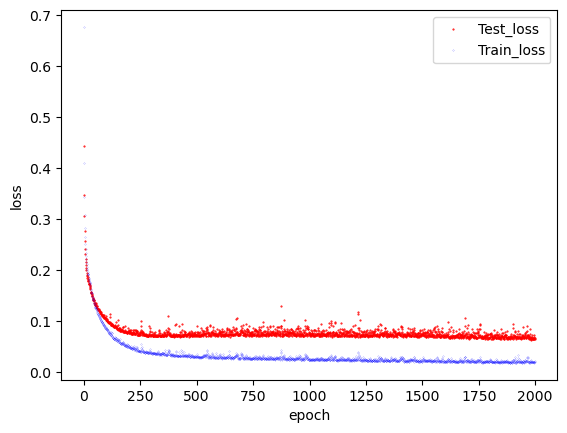

In [37]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, "o", markersize= 0.5, c='red', label='Test_loss')
plt.plot(x_len, y_loss, "o", markersize= 0.1,c='blue', label='Train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [38]:
#  중단점 설정
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#중단점과 저장 설정
early_stopping_callback = EarlyStopping(patience=20)
checkpointer = ModelCheckpoint(filepath=model_path, verbose=0, save_best_only=True)
                               

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
         callbacks=[ early_stopping_callback,checkpointer])                               
                               

Epoch 1/2000
8/8 [==============================] - 4s 95ms/step - loss: 12.4587 - accuracy: 0.2476 - val_loss: 9.4032 - val_accuracy: 0.2346
Epoch 2/2000
8/8 [==============================] - 0s 34ms/step - loss: 6.7001 - accuracy: 0.2471 - val_loss: 3.8469 - val_accuracy: 0.2338
Epoch 3/2000
8/8 [==============================] - 0s 24ms/step - loss: 1.8882 - accuracy: 0.3911 - val_loss: 0.4063 - val_accuracy: 0.8400
Epoch 4/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3991 - accuracy: 0.8368 - val_loss: 0.4430 - val_accuracy: 0.8308
Epoch 5/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.4850 - accuracy: 0.8317 - val_loss: 0.4725 - val_accuracy: 0.8431
Epoch 6/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.4643 - accuracy: 0.8548 - val_loss: 0.4056 - val_accuracy: 0.8700
Epoch 7/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.3827 - accuracy: 0.8802 - val_loss: 0.3249 - val_accuracy: 0.8985
Epoch 8/2000

Epoch 59/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.1161 - accuracy: 0.9566 - val_loss: 0.1323 - val_accuracy: 0.9546
Epoch 60/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1175 - accuracy: 0.9571 - val_loss: 0.1386 - val_accuracy: 0.9523
Epoch 61/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1144 - accuracy: 0.9571 - val_loss: 0.1332 - val_accuracy: 0.9515
Epoch 62/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1112 - accuracy: 0.9587 - val_loss: 0.1289 - val_accuracy: 0.9523
Epoch 63/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1105 - accuracy: 0.9574 - val_loss: 0.1301 - val_accuracy: 0.9531
Epoch 64/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1083 - accuracy: 0.9597 - val_loss: 0.1357 - val_accuracy: 0.9508
Epoch 65/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1120 - accuracy: 0.9582 - val_loss: 0.1272 - val_accuracy: 0.9492
Epoch 

8/8 [==============================] - 0s 30ms/step - loss: 0.0711 - accuracy: 0.9759 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 117/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0721 - accuracy: 0.9751 - val_loss: 0.1036 - val_accuracy: 0.9731
Epoch 118/2000
8/8 [==============================] - 0s 28ms/step - loss: 0.0701 - accuracy: 0.9751 - val_loss: 0.1031 - val_accuracy: 0.9731
Epoch 119/2000
8/8 [==============================] - 0s 33ms/step - loss: 0.0700 - accuracy: 0.9769 - val_loss: 0.1029 - val_accuracy: 0.9715
Epoch 120/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 121/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.1022 - val_accuracy: 0.9708
Epoch 122/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.0686 - accuracy: 0.9769 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 123/2000

8/8 [==============================] - 0s 19ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0963 - val_accuracy: 0.9746
Epoch 174/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.0556 - accuracy: 0.9805 - val_loss: 0.0917 - val_accuracy: 0.9754
Epoch 175/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.0525 - accuracy: 0.9828 - val_loss: 0.0921 - val_accuracy: 0.9746
Epoch 176/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.0521 - accuracy: 0.9818 - val_loss: 0.0913 - val_accuracy: 0.9762
Epoch 177/2000
8/8 [==============================] - 0s 31ms/step - loss: 0.0523 - accuracy: 0.9826 - val_loss: 0.0912 - val_accuracy: 0.9762
Epoch 178/2000
8/8 [==============================] - 0s 28ms/step - loss: 0.0517 - accuracy: 0.9820 - val_loss: 0.0942 - val_accuracy: 0.9746
Epoch 179/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0528 - accuracy: 0.9818 - val_loss: 0.0927 - val_accuracy: 0.9746
Epoch 180/2000

8/8 [==============================] - 0s 19ms/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0871 - val_accuracy: 0.9769
Epoch 231/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0444 - accuracy: 0.9843 - val_loss: 0.0851 - val_accuracy: 0.9800
Epoch 232/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.0893 - val_accuracy: 0.9754
Epoch 233/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0852 - val_accuracy: 0.9792
Epoch 234/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0868 - val_accuracy: 0.9769
Epoch 235/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0873 - val_accuracy: 0.9769
Epoch 236/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0839 - val_accuracy: 0.9808
Epoch 237/2000

8/8 [==============================] - 0s 21ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 0.0865 - val_accuracy: 0.9762
Epoch 288/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.0863 - val_accuracy: 0.9762
Epoch 289/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0869 - val_accuracy: 0.9762
Epoch 290/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0908 - val_accuracy: 0.9762
Epoch 291/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0855 - val_accuracy: 0.9762
Epoch 292/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.9856 - val_loss: 0.0842 - val_accuracy: 0.9769
Epoch 293/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.9864 - val_loss: 0.0936 - val_accuracy: 0.9769
Epoch 294/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.9877 - val_loss: 0.0820 - val_accuracy: 0.9777
Epoch 345/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.0847 - val_accuracy: 0.9769
Epoch 346/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.9877 - val_loss: 0.0825 - val_accuracy: 0.9769
Epoch 347/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.9874 - val_loss: 0.0945 - val_accuracy: 0.9769
Epoch 348/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.9861 - val_loss: 0.0853 - val_accuracy: 0.9777
Epoch 349/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0353 - accuracy: 0.9874 - val_loss: 0.0801 - val_accuracy: 0.9792
Epoch 350/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.9872 - val_loss: 0.0895 - val_accuracy: 0.9769
Epoch 351/2000